# AMAT 503 Assignment 3
## Qiyue Zhang
## 10131658

# Question 1


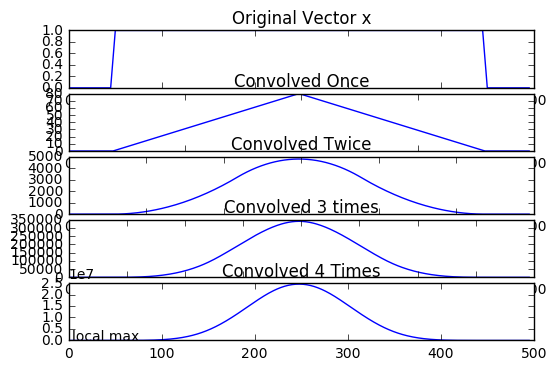

In [13]:
from numpy import *
from matplotlib.pyplot import *
from scipy.signal import convolve2d

x = concatenate((zeros(10), ones(80), zeros(10)), axis = 0)

x1 = convolve(x, x)
x2 = convolve(x1, x)
x3 = convolve(x2, x)
x4 = convolve(x3, x)

f, arr = subplots(5, 1)

arr[0].plot(x)
arr[0].set_title('Original Vector x')
arr[1].plot(x1)
arr[1].set_title('Convolved Once')
arr[2].plot(x2)
arr[2].set_title('Convolved Twice')
arr[3].plot(x3)
arr[3].set_title('Convolved 3 times')
arr[4].plot(x4)
arr[4].set_title('Convolved 4 Times')
arr[4].annotate('local max', xy=(2, 1), xytext=(3, 10))
f.subplots_adjust(hspace = 0.1)

show()

# Question 2

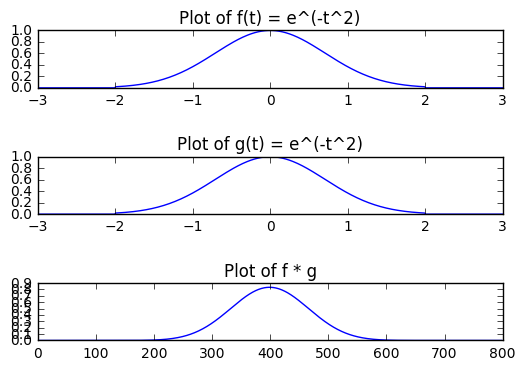

In [14]:
from numpy import *
from matplotlib.pyplot import *
from scipy.signal import convolve2d

def f(t):
    return (t > -2)*(t < 2)*(exp(-(t**2)))

def g(t):
    return (t > -2)*(t < 2)*(exp(-(t**2)))

Delta = 0.01
t = linspace(-3, 3, round(4/Delta))
x = f(t)
y = g(t)
z = Delta*convolve(x, y)

f, arr = subplots(3, 1)

arr[0].plot(t, x)
arr[0].set_title('Plot of f(t) = e^(-t^2)')
arr[1].plot(t, y)
arr[1].set_title('Plot of g(t) = e^(-t^2)')
arr[2].plot(z)
arr[2].set_title('Plot of f * g')
f.subplots_adjust(hspace = 1.2)

show()


# Question 3

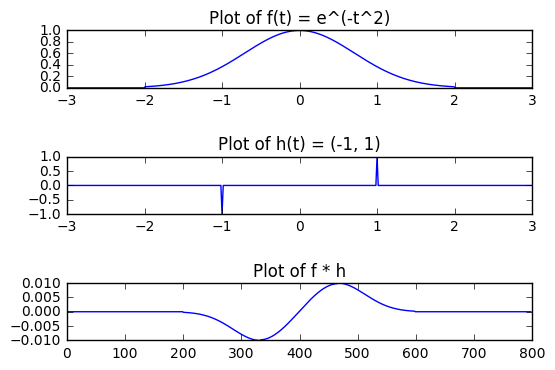

In [15]:
from numpy import *
from matplotlib.pyplot import *
from scipy.signal import convolve2d

def f(t):
    return (t > -2)*(t < 2)*(exp(-(t**2)))

def h(t):
    return ((t == -1)+(t == 1))*t

Delta = 0.01
t = linspace(-3, 3, round(4/Delta))
x = f(t)
y = h(t)
z = Delta*convolve(x, y)

f, arr = subplots(3, 1)

arr[0].plot(t, x)
arr[0].set_title('Plot of f(t) = e^(-t^2)')
arr[1].plot(t, y)
arr[1].set_title('Plot of h(t) = (-1, 1)')
arr[2].plot(z)
arr[2].set_title('Plot of f * h')
f.subplots_adjust(hspace = 1.2)

show()

# Question 3

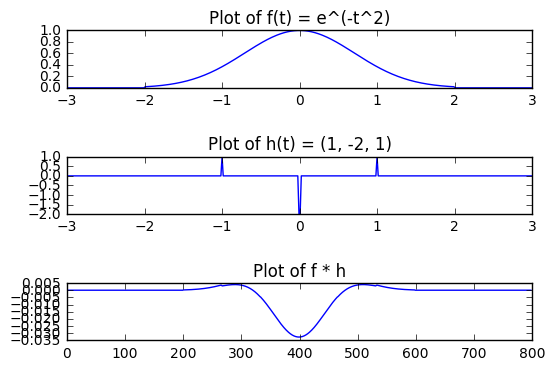

In [16]:
from numpy import *
from matplotlib.pyplot import *
from scipy.signal import convolve2d

def f(t):
    return (t > -2)*(t < 2)*(exp(-(t**2)))

def h(t):
    return (((t == -1) + (t == 1)) * 1) + ((t >= -(6/round(4/Delta)))*(t <= (6/round(4/Delta))) )*(-2)
    # return (((t == -1) + (t == 1)) * 1) + ((t == 0) * -2)

Delta = 0.01
t = linspace(-3, 3, round(4/Delta))
x = f(t)
y = h(t)
z = Delta*convolve(x, y)

f, arr = subplots(3, 1)

arr[0].plot(t, x)
arr[0].set_title('Plot of f(t) = e^(-t^2)')
arr[1].plot(t, y)
arr[1].set_title('Plot of h(t) = (1, -2, 1)')
arr[2].plot(z)
arr[2].set_title('Plot of f * h')
f.subplots_adjust(hspace = 1.2)

show()


# Question 5

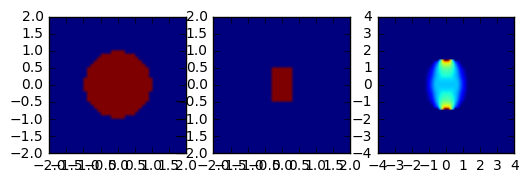

In [17]:
from numpy import *
from matplotlib.pyplot import *
from scipy.signal import convolve2d
from sklearn.preprocessing import normalize

def ff(x,y):
    return (x**2 + y**2 <1)

def gg(x,y):
    return (abs(x)<.5)*(abs(y)<.3)

Delta = .1
x = linspace(-2,2,round(4/Delta))
y = linspace(-2,2,round(4/Delta))

ffimg = zeros((size(x),size(y)))
ggimg = zeros((size(x),size(y)))
for j in range(size(x)):
    for k in range(size(y)):
        ffimg[j,k]=ff(x[j],y[k])
        ggimg[j,k]=gg(x[j],y[k])

########################################
# This, hopefully, normalizes ffimg ggimg
########################################
# ffimg = normalize(ffimg, axis = 1, norm = 'l1')
# ggimg = normalize(ggimg, axis = 1, norm = 'l1')
########################################

result = convolve2d(ffimg,ggimg)
result = normalize(result, axis = 1, norm = 'l1')

subplot(1,3,1)
extent = min(x), max(x), min(y), max(y)
imshow(ffimg, extent=extent)
subplot(1,3,2)
imshow(ggimg, extent=extent)
subplot(1,3,3)
imshow(result, extent=(-4,4,-4,4))
show()

# Question 6

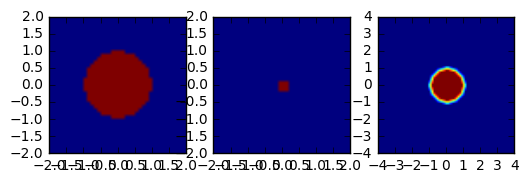

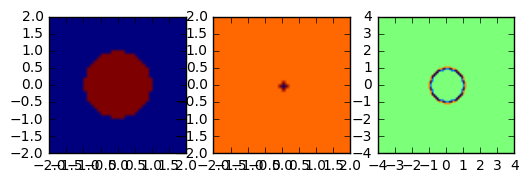

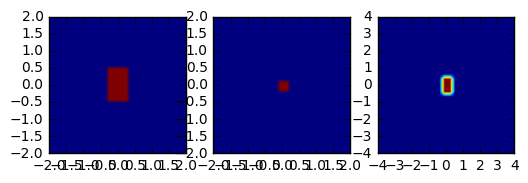

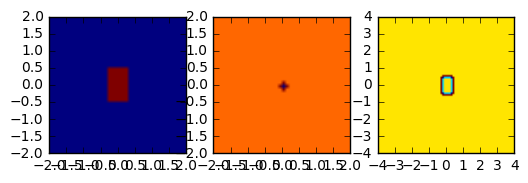

In [18]:
from numpy import *
from matplotlib.pyplot import *
from scipy.signal import convolve2d

def ff(x,y):
    return (x**2 + y**2 <1)

def gg(x,y):
    return (abs(x)<.5)*(abs(y)<.3)

# gs = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
# hs = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]

Delta = .1
x = linspace(-2,2,round(4/Delta))
y = linspace(-2,2,round(4/Delta))

ffimg = zeros((size(x),size(y)))
ggimg = zeros((size(x),size(y)))

g = zeros((size(x),size(y)))
h = zeros((size(x),size(y)))

midX = (int)(size(x)/2)
midY = (int)(size(y)/2)

for i in range(3):
    g[midX - 1, midY + i - 1] = 1
    g[midX, midY + i - 1] = 1
    g[midX + 1, midY + i - 1] = 1

h[midX - 1, midY - 1] = 0
h[midX - 1, midY] = 1
h[midX - 1, midY + 1] = 0

h[midX, midY - 1] = 1
h[midX, midY] = -4
h[midX, midY + 1] = 1

h[midX + 1, midY - 1] = 0
h[midX + 1, midY] = 1
h[midX + 1, midY + 1] = 0


for j in range(size(x)):
    for k in range(size(y)):
        ffimg[j,k]=ff(x[j],y[k])
        ggimg[j,k]=gg(x[j],y[k])

# Convolution of circle image with filter g
r1 = convolve2d(ffimg, g)

# Convolution of circle image with filter h
r2 = convolve2d(ffimg, h)

# Convolution of rectangle image with filter g
r3 = convolve2d(ggimg, g)

# Convolution of rectangle image with filter h
r4 = convolve2d(ggimg, h)

subplot(1,3,1)
extent = min(x), max(x), min(y), max(y)
imshow(ffimg, extent=extent)
subplot(1,3,2)
imshow(g, extent=extent)
subplot(1,3,3)
imshow(r1, extent=(-4,4,-4,4))
show()

subplot(1,3,1)
extent = min(x), max(x), min(y), max(y)
imshow(ffimg, extent=extent)
subplot(1,3,2)
imshow(h, extent=extent)
subplot(1,3,3)
imshow(r2, extent=(-4,4,-4,4))
show()

subplot(1,3,1)
extent = min(x), max(x), min(y), max(y)
imshow(ggimg, extent=extent)
subplot(1,3,2)
imshow(g, extent=extent)
subplot(1,3,3)
imshow(r3, extent=(-4,4,-4,4))
show()

subplot(1,3,1)
extent = min(x), max(x), min(y), max(y)
imshow(ggimg, extent=extent)
subplot(1,3,2)
imshow(h, extent=extent)
subplot(1,3,3)
imshow(r4, extent=(-4,4,-4,4))
show()

# Question 7

In [19]:
from numpy import *
from matplotlib.pyplot import *
from scipy.signal import convolve2d
from PIL import Image

# gs = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
# hs = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]

img = Image.open('image1.png').convert('L');
WIDTH, HEIGHT = img.size

data = list(img.getdata()) # convert image data to a list of integers
# convert that to 2D list (list of lists of integers)
data = [data[offset:offset+WIDTH] for offset in range(0, WIDTH*HEIGHT, WIDTH)]

image = zeros((WIDTH, HEIGHT))

for i in range(WIDTH):
    for j in range(HEIGHT):
        image[i,j] = data[j][i]


g = zeros((WIDTH, HEIGHT))
h = zeros((WIDTH, HEIGHT))

midX = (int)(WIDTH/2)
midY = (int)(HEIGHT/2)

for i in range(3):
    g[midX - 1, midY + i - 1] = 1
    g[midX, midY + i - 1] = 1
    g[midX + 1, midY + i - 1] = 1

h[midX - 1, midY - 1] = 0
h[midX - 1, midY] = 1
h[midX - 1, midY + 1] = 0

h[midX, midY - 1] = 1
h[midX, midY] = -4
h[midX, midY + 1] = 1

h[midX + 1, midY - 1] = 0
h[midX + 1, midY] = 1
h[midX + 1, midY + 1] = 0

# Convolution of circle image with filter g
r1 = convolve2d(image, g)

# Convolution of circle image with filter h
r2 = convolve2d(image, h)



subplot(1,3,1)
extent = 0, WIDTH, 0, HEIGHT
imshow(image, extent=extent)
subplot(1,3,2)
imshow(g, extent=extent)
subplot(1,3,3)
imshow(r1, extent=(-4,4,-4,4))
show()

subplot(1,3,1)
extent = 0, WIDTH, 0, HEIGHT
imshow(image, extent=extent)
subplot(1,3,2)
imshow(h, extent=extent)
subplot(1,3,3)
imshow(r2, extent=(-4,4,-4,4))
show()

ImportError: libjpeg.so.9: cannot open shared object file: No such file or directory

# Question 8

In [ ]:
from numpy import *
from matplotlib.pyplot import *


def f(t):
    sigma = 1
    
    return (t>-1)*(t<1)
    #1. return (t>-1)*(t<1)
    #2. return (t > -1) * (t < 1) * t
    #3. return 1 - (t <= -1) * (t >= 1) - (t > -1) * (t < 1) * t * t
    #4. return exp(-(t*t)/(sigma**2))

sigma = 1

Delta_t = .01
t = linspace(-2,2,round(4/Delta_t))

def fhat(w):
    return Delta_t*dot(f(t),exp(-2*pi*1j*w*t))

## Prepare the output samples of the Fourier transform
Delta_w = .1

L = 1

w = linspace(-L,L,round(20/Delta_w))

fhat_out = zeros(size(w),dtype=complex_)
for k in range(size(w)):
    fhat_out[k] = fhat(w[k])

plot(w,real(fhat_out))
show()


# Question 9

In [ ]:
from numpy import *
from matplotlib.pyplot import *


def f(t):
    sigma = 1
    #1. return (t>-1)*(t<1)
    #2. return (t > -1) * (t < 1) * t
    #3. return 1 - (t <= -1) * (t >= 1) - (t > -1) * (t < 1) * t * t


Delta_t = .01
t = linspace(-2,2,round(4/Delta_t))

def fhat(w):
    return Delta_t*dot(f(t),exp(-2*pi*1j*w*t))

## Prepare the output samples of the Fourier transform
Delta_w = .1

L = 1

w = linspace(-L,L,round(20/Delta_w))

fhat_out = zeros(size(w),dtype=complex_)
for k in range(size(w)):
    fhat_out[k] = fhat(w[k])

plot(w,real(fhat_out))
show()